Klasifikasi Tulisan Tangan pada Dataset MNIST dengan Metode HOG Feature Extraction dan Support Vector Machine (SVM)

In [3]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from mlxtend.data import loadlocal_mnist
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix
import random
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

1. Inisialisasi Variabel dengan Dataset

In [4]:
train_images, train_labels = loadlocal_mnist(images_path='datatrain_mnist/train-images.idx3-ubyte',
                                             labels_path='datatrain_mnist/train-labels.idx1-ubyte')

In [6]:
test_images, test_labels = loadlocal_mnist(images_path='datates_mnist/t10k-images.idx3-ubyte',
                                             labels_path='datates_mnist/t10k-labels.idx1-ubyte')

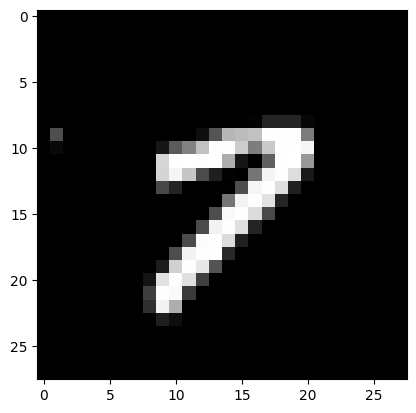

In [7]:
plt.imshow(train_images[29].reshape(28,28), cmap='gray')

In [8]:
train_labels[29]

7

2. Ekstraksi Fitur HOG untuk Setiap Gambar dalam Dataset

In [9]:
x_train = []
for i in train_images.reshape(-1,28,28):
    img, _ = hog(i, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True)
    x_train.append(img)

In [10]:
x_train = np.array(x_train)
y_train = np.array(train_labels)

In [11]:
x_tes = []
for i in test_images.reshape(-1,28,28):
    img, _ = hog(i, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True)
    x_tes.append(img)

In [12]:
x_tes = np.array(x_tes)
y_tes = np.array(test_labels)

3. Klasifikasi SVM

In [13]:
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_tes)


4. Uji Coba Sampel 

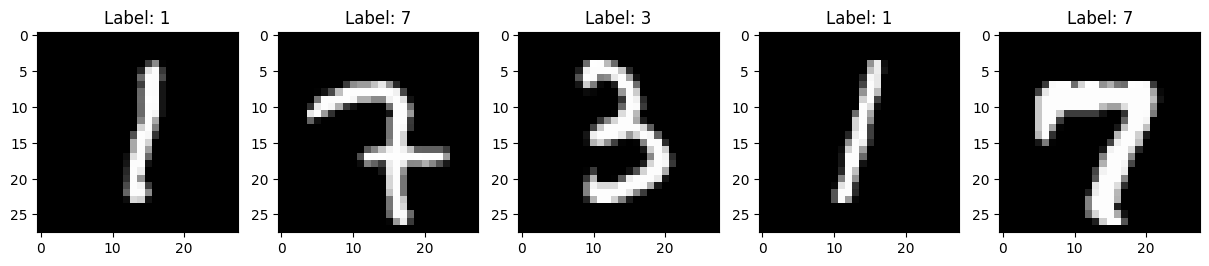

In [14]:
def sampletest():
    random_indices = random.sample(range(len(test_images)), 5)

    plt.figure(figsize=(15, 3))
    for i, index in enumerate(random_indices, 1):
        plt.subplot(1, 5, i)
        plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y_tes[index]}")

    plt.show()

sampletest()

5. Evaluasi Ketepatan dengan Matriks Konfusi dan Presisi Model

In [15]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

a. Matriks Konfusi

In [16]:
conf_mat = confusion_matrix(y_tes,y_pred)
conf_mat

array([[ 973,    0,    1,    0,    0,    0,    5,    1,    0,    0],
       [   1, 1124,    6,    0,    2,    0,    1,    1,    0,    0],
       [   2,    0, 1011,    6,    2,    0,    1,    8,    2,    0],
       [   2,    2,    8,  979,    0,    2,    0,    4,    6,    7],
       [   4,    1,    0,    0,  950,    0,    9,    2,    2,   14],
       [   3,    0,    0,   10,    0,  865,    7,    1,    5,    1],
       [   6,    2,    1,    0,    2,    4,  940,    0,    2,    1],
       [   0,    3,   13,    3,   11,    0,    0,  981,    4,   13],
       [   6,    1,    4,   12,    2,    4,    1,    3,  934,    7],
       [   2,    3,    0,    5,   11,    4,    0,    4,   13,  967]],
      dtype=int64)

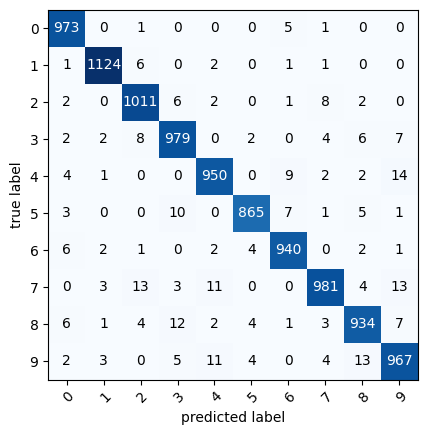

In [17]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

b. Presisi

In [18]:
precision = precision_score(y_tes, y_pred, average=None)
precision

array([0.97397397, 0.98943662, 0.9683908 , 0.96453202, 0.96938776,
       0.98407281, 0.97510373, 0.9761194 , 0.96487603, 0.95742574])

c. Akurasi

In [19]:
accuracy = accuracy_score(y_tes, y_pred)
accuracy

0.9724